In [39]:
import serial
import numpy as np
frequency = 16000

def listen_on_com_port(com_port, baud_rate, seconds):
    serial_com = serial.Serial(port=com_port, baudrate=baud_rate)
    data_list = np.zeros(frequency * seconds)
    
    data = serial_com.read(size = len(data_list))
    data_list = np.frombuffer(data, np.int8)

    return data_list


In [40]:
com_port = "COM4"
baud_rate = 9600
data_list = listen_on_com_port(com_port, baud_rate, seconds=8)
print(len(data_list))

128000


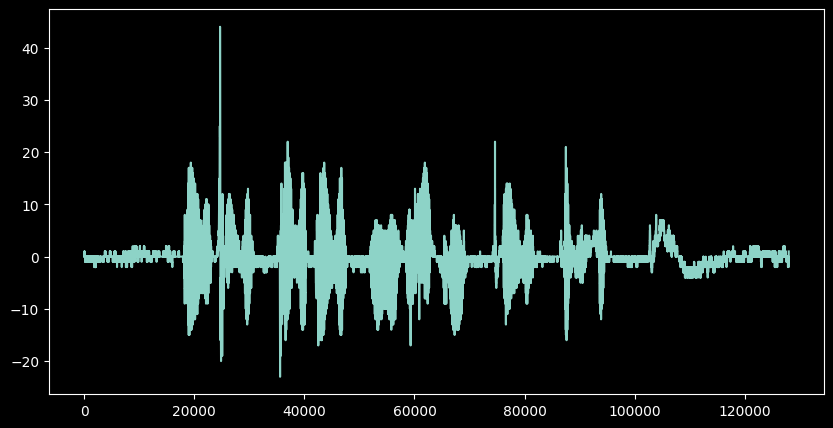

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(data_list)
plt.show()

In [42]:
import wave

def save_data_list_as_wav(data_list, file_name):
    with wave.open(file_name, "wb") as wav_file:
        wav_file.setnchannels(1)
        wav_file.setsampwidth(2)
        wav_file.setframerate(frequency)
        wav_file.setnframes(len(data_list) * 2)
        
         # Convert the raw data to a byte array
        raw_bytes = data_list.astype(np.int16).tobytes()

        # Write the raw data to the wave file
        wav_file.writeframes(raw_bytes)
       


In [45]:

file_name = "sample_test_onebyte.wav"
data_list = data_list.astype(np.int16)
data_list = np.multiply(data_list, 40)
save_data_list_as_wav(data_list, file_name)